# Baesyan Data Analysis Course - Chapter 2 Exercises
https://github.com/avehtari/BDA_course_Aalto/tree/master/exercises

### Exercise 1 - Inference for normal mean and deviation 

A factory has a production line for manufacturing car windshields. A sample of windshields has been taken for testing hardness (sample of observed values available in file *windshields1.txt*). We may assume that the observations follow a normal distribution with an unknown standard deviation $\sigma$. We wish to obtain information about the unknown average hardness $\mu$. Here it is not necessary to derive the posterior distribution as it has already been done in the book.

#### Formulate (1) model likelihood, (2) the prior, and (3) the resulting posterior:

**Answer:** 

Model:

$$y_i|\mu, \sigma^2 \propto \dfrac{1}{\sigma^2}\times exp\left[\dfrac{-(y_i-\mu)^2}{2\sigma^2}\right]$$

Likelihood:

$$p(y|\mu, \sigma^2) = \prod_{i = 1}^n p(y_i|\mu, \sigma^2)$$

Non-informative prior:

$$p(\mu, \sigma) \propto (\sigma^2)^{-1}$$

Joint posterior:

$$p(\mu, \sigma^2|y) \propto \sigma^{-n-2} \times exp\left\{\dfrac{-1}{2\sigma^2}[(n-1)s^2 + n(\bar{y} - \mu)^2]\right\}$$

where $s^2 = \dfrac{1}{n-1}\sum_{i=1}^n(y_i - \bar{y})^2$.

#### a) What can you say about the unknown $\mu$? Summarize your results using Bayesian point estimate (i.e. $E(\mu|y)$), a posterior interval (95\%), and plot the density.


In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, chi2, norm

ws1 = pd.read_csv('Data//windshieldy1.txt', sep=" ", header=None)
ws1 = ws1.to_numpy()
ws_test = [13.357, 14.928, 14.896, 14.820]

In [126]:
def mu_point_est(ws_data):
    return(np.mean(ws_data))

def mu_interval(ws_data, prob):
    y_mean = np.mean(ws_data)
    n = len(ws_data)
    s_sqr = 1/(n - 1)*sum((ws_data-y_mean)**2)
    return t.interval(prob, df = n-1, loc = y_mean, scale = np.sqrt(s_sqr/n))

def mu_plot(ws_data):
    y_mean = np.mean(ws_data)
    n = len(ws_data)
    s_sqr = 1/(n - 1)*sum((ws_data-y_mean)**2)
    mu_space = np.linspace(y_mean - 20*s_sqr/n, y_mean + 20*s_sqr/n, 200)
    probs = t.pdf(mu_space, df = n-1, loc=y_mean, scale=np.sqrt(s_sqr/n))
    
    fig, ax = plt.subplots()
    ax.plot(mu_space, probs)
    ax.vlines(y_mean, colors = 'blue', ymin = 0, ymax = max(probs))
    ax.vlines(mu_interval(ws_data, 0.95), colors = 'red', linestyles="dashed", ymin = 0, ymax = max(probs))

    plt.title("Marginal posterior density for μ")
    plt.ylabel("p(μ|y)")
    plt.xlabel("μ")
    plt.show()
    
def show_answer_1a(ws_data, prob=0.95):
    print("E(μ|y) =", mu_point_est(ws_data))
    print("95% C.I:", mu_interval(ws_data, 0.95))
    mu_plot(ws_data)

E(μ|y) = 15.821076923076927
95% C.I: (array([15.29376402]), array([16.34838982]))


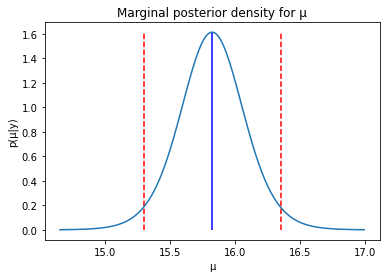

In [127]:
show_answer_1a(ws1)

#### b) What can you say about the hardness of the next windshield coming from the production line before actually measuring the hardness? Summarize your results using Bayesian point estimate, apredictive interval (95\%), and plot the density.

In [130]:
def show_answer_1b(ws_data):
    y_mean = np.mean(ws_data)
    n = len(ws_data)
    s_sqr = 1/(n - 1)*sum((ws_data-y_mean)**2)
    y_space = np.linspace(y_mean - 5*np.sqrt((1+1/n)*s_sqr), y_mean + 5*np.sqrt((1+1/n)*s_sqr), 200)
    probs = t.pdf(y_space, df = n-1, loc=y_mean, scale=np.sqrt((1+1/n)*s_sqr))
    q95 = t.interval(0.95, df = n-1, loc=y_mean, scale=np.sqrt((1+1/n)*s_sqr))
    
    
    print("E(y_bar|y) =", y_mean)
    print("95% C.I:", q95)
    
    fig, ax = plt.subplots()
    ax.plot(y_space, probs)
    ax.vlines(y_mean, colors = 'blue', ymin = 0, ymax = max(probs))
    ax.vlines(q95, colors = 'red', linestyles="dashed", ymin = 0, ymax = max(probs))

    plt.title("Posterior predictive distribution")
    plt.ylabel("p(y_bar|y)")
    plt.xlabel("y_bar")
    plt.show()

E(y_bar|y) = 15.821076923076927
95% C.I: (array([13.84805272]), array([17.79410113]))


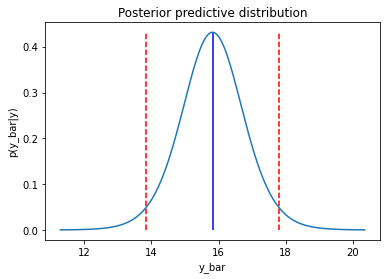

In [131]:
show_answer_1b(ws1)

### Exercise 2 - Inference for the difference between proportions

An experiment was performed to estimate the effect of beta-blockers
on mortality of cardiac patients. A group of patients was randomly
assigned to treatment and control groups: out of 674 patients
receiving the control, 39 died, and out of 680 receiving the
treatment, 22 died. Assume that the outcomes are independent and
binomially distributed, with probabilities of death of $p_0$ and $p_1$
under the control and treatment, respectively. Set up a noninformative
or weakly informative prior distribution on $(p_0,p_1)$.

#### In the report, formulate (1) model likelihood, (2) the prior, and (3) the resulting posterior.

**Answer:** Let $k = 0, 1$, where $0$ indicates control group, and $1$ indicates treatment group. The model likelihood is 

$$p(y_k|p_k) = Binomial(p_k, n_k)$$. 

A non-informative prior for $p_k$ is is $Beta(1, 1)$, which is equivalent to a uniform(0, 1). This yields the following posterior:

$$p(p_k|y) = Beta(1+y_k, 1+n_k-y_k)$$

so $p(p_0|y_0) = Beta(40, 636)$ and $p(p_1|y_1) = Beta(23, 659)$.

#### a) Summarize the posterior distribution for the odds ratio, $(p_1/(1-p_1))/(p_0/(1-p_0))$. Compute the point estimate, a posterior interval (95\%), and plot the histogram. Use [Frank Harrell's recommendations](http://www.fharrell.com/2017/10/bayesian-vs-frequentist-statements.html) how to state results in Bayesian two group comparison.


point estimate: 0.57
95% CI: [0.321 0.925]
probability odds ratio < 1: 0.98767


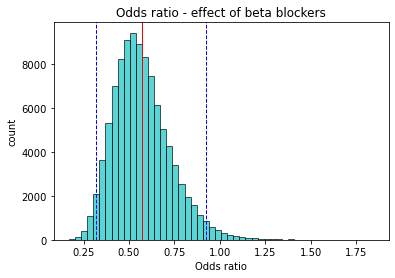

In [199]:
from scipy.stats import beta
α0, β0, α1, β1 = 40, 636, 23, 659

p0 = beta.rvs(a = α0, b = β0, size = 100000)
p1 = beta.rvs(a = α1, b = β1, size = 100000)
odds = (p1/(1-p1)) / (p0/(1-p0))

point_estimate = np.mean(odds)
q95 = np.sort(odds)[2500:97500]
q95 = [min(q95), max(q95)]

# also calculate probability that odds ratio < 1:
prob_odds_leq_1 = 1 -len(odds[odds > 1])/len(odds)

print("point estimate:", np.round(point_estimate, 3))
print("95% CI:", np.round(q95, 3))
print("probability odds ratio < 1:", prob_odds_leq_1)

fig, ax = plt.subplots()
ax.hist(odds, bins = 50, color='c', edgecolor='k', alpha=0.65)
ax.axvline(x=point_estimate, ymin = 0, ymax = max(odds), color = 'red', linewidth=1)
ax.axvline(x=q95[0], ymin = 0, ymax = max(odds), color = 'blue', linestyle = "dashed", linewidth=1)
ax.axvline(x=q95[1], ymin = 0, ymax = max(odds), color = 'blue', linestyle = "dashed", linewidth=1)
ax.set_title('Odds ratio - effect of beta blockers')
ax.set_ylabel('count')
ax.set_xlabel('Odds ratio')
ax.tick_params(axis='x', reset=True, top=False)
plt.show()

Assuming uniform prior for both $p_0$ and $p_1$, the odds are probabily (0.988) lower under beta blockers. The posterior mean of the odds ratio is 0.57, and the probability that it is between 0.321 and 0.925 is 95\%.

#### b) Discuss the sensitivity of your inference to your choice of prior density with a couple of sentences.

**Answer:** The non-informative Beta(1, 1) prior was assigned, but it is not necessarily the best choise. Prior knowledge about the actual probability of mortality under no treatment could be useful in assign a more reasonable prior. But since the sample sizes are large (674 and 680), the weight of the prior in the posterior is actually low, and a prior more centered in low values (instead of uniform in \[0, 1\]) is better but would result in almost equal conclusions. What our prior do, that isn't reasonable, is put a heavier tail in the right side of the posterior for $p_0$ and $p_1$. But this is "outweighted", given the sample size.

### Exercise 3 - Inference for the difference between normal means

Consider a case where the same factory has two production lines for manufacturing car windshields. Independent samples from the two production lines were tested for hardness. The hardness measurements for the two samples $\mathbf{y}_1$ and $\mathbf{y}_2$ are given in the files *windshieldy1.txt* and *windshieldy2.txt*.

We assume that the samples have unknown standard deviations $\sigma_1$ and $\sigma_2$.

#### In the report, formulate (1) model likelihood, (2) the prior, and (3) the resulting posterior.

**Answer:** Same as in exercise 1 (non-informative prior).

#### a) What can you say about $\mu_d = \mu_1 - \mu_2$? Summarize your results using a Bayesian point estimate, a posterior interval (95\%), and plot the histogram. Use [Frank Harrell's recommendations](http://www.fharrell.com/2017/10/bayesian-vs-frequentist-statements.html) how to state results in Bayesian two group comparison.

point estimate: 1.21
95% CI: [-0.035  2.459]
p(μd > 0) = 0.972124


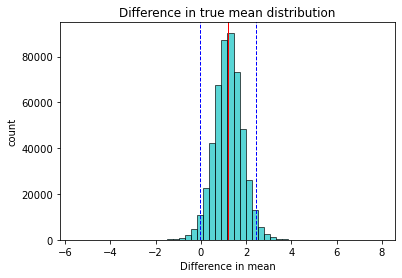

In [208]:
ws2 = pd.read_csv('Data//windshieldy2.txt', sep=" ", header=None)
ws2 = ws2.to_numpy()

def sim_mu(ws_data, size):
    y_mean = np.mean(ws_data)
    n = len(ws_data)
    s_sqr = 1/(n - 1)*sum((ws_data-y_mean)**2)
    return t.rvs(df = n-1, loc = y_mean, scale = np.sqrt(s_sqr/n), size = size)

size = 500000
mu_ws1 = sim_mu(ws1, size)
mu_ws2 = sim_mu(ws2, size)
μd = mu_ws1 - mu_ws2
point_estimate = np.mean(μd)
q95 = np.sort(μd)[int(size*0.025):int(size*0.975)]
q95 = [min(q95), max(q95)]
μd_geq0 = len(μd[μd > 0])/len(μd)

print("point estimate:", np.round(point_estimate, 3))
print("95% CI:", np.round(q95, 3))
print("p(μd > 0) =", μd_geq0)


fig, ax = plt.subplots()
ax.hist(μd, bins = 50, color='c', edgecolor='k', alpha=0.65)
ax.axvline(x=point_estimate, ymin = 0, ymax = max(odds), color = 'red', linewidth=1)
ax.axvline(x=q95[0], ymin = 0, ymax = max(odds), color = 'blue', linestyle = "dashed", linewidth=1)
ax.axvline(x=q95[1], ymin = 0, ymax = max(odds), color = 'blue', linestyle = "dashed", linewidth=1)
ax.set_title('Difference in true mean distribution')
ax.set_ylabel('count')
ax.set_xlabel('Difference in mean')
ax.tick_params(axis='x', reset=True, top=False)
plt.show()

Considering non-informative priors, windshields hardness of production line 1, $\mathbf(y_1)$ are probably (0.972) higher than windshields hardness of production line 2. The probability that production line 1 hardness is inferior is 0.028. The posterior mean difference was $1.21$, and the $0.95$ C.I. $[-0.035, 2.459]$. The probability is 0.95 that the true mean difference is in the interval $[-0.035, 2.459]$.

#### b) What is the probability that the means are the same? Explain your reasoning with a couple of sentences.

The probability that the means are the same is zero, since $\mu_d$ has a continous distribution. But we can assume a minimally important difference. For example, if a minimal important difference is $m$, the probability that $\mu_1$ is within $m$ of $\mu_2$ is the probability that $\mu_d \in [-m, m]$. If $m = 1$, this probability is: 

In [218]:
minimal_importance = 1
a = μd[(μd >= -minimal_importance)]
a = a[a <= minimal_importance]
print("p(-1<μd<1|y) =", len(a)/len(μd))

p(-1<μd<1|y) = 0.357758
